# Aim

Test combined correction based on the stored data generated from combined_correction.ipynb

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal, stats, optimize

from observer import *

In [2]:
tt = np.load('./combined.npy')

(1e-07, 1121.1721253223704)

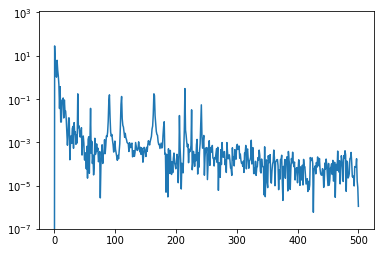

In [3]:
psd = get_psd(tt[:,0])
plt.semilogy(freqs, psd)
plt.ylim(1e-7)

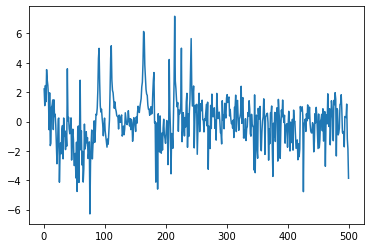

In [4]:
# first, get the fit line
log_freqs, log_power = np.log(freqs[1:]), np.log(psd[1:])
m, b = stats.linregress(log_freqs, log_power)[:2]
plt.plot(freqs[1:], log_power - (m * log_freqs + b))

In [5]:
residual_psd = psd[1:] - np.e**b * freqs[1:]**m

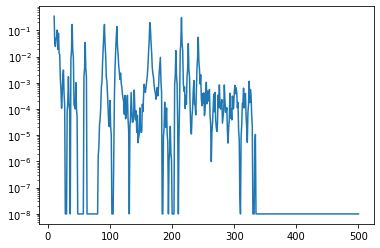

In [6]:
plt.semilogy(freqs[10:], noise_filter(residual_psd)[9:])

[ 4  3 12  7 10 23 29  2  1  0]


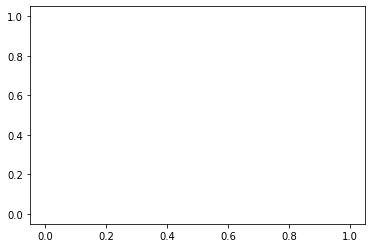

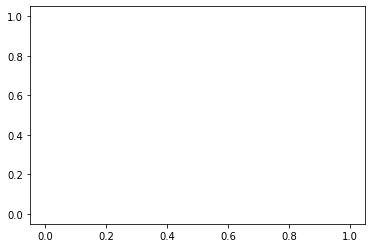

ValueError: x and y must have same first dimension, but have shapes (10,) and (3,)

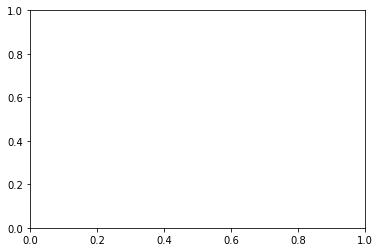

In [7]:
vibe_fit_freq(noise_filter(residual_psd))